# Data understanding
En el siguiente .ipynb, se entenderá los datos que contiene el dataset principal y finalmente se analizarán los dataset complementarios.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración visual para gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Ubicación de los datos
DATA_PATH = '../data/'

print("Cargando datos...")

# Cargamos datos para .parquet
df_app = pd.read_parquet(f'{DATA_PATH}application_.parquet')

# Dimensión del DataFrame
print(f"Dimensiones del DataFrame(filas, columnas): {df_app.shape}")

# Mostrar las primeras filas del DataFrame
display(df_app.head())

Cargando datos...
Dimensiones del DataFrame(filas, columnas): (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


A continuación analizaremos el desbalance del TARGET

Analisis de target...


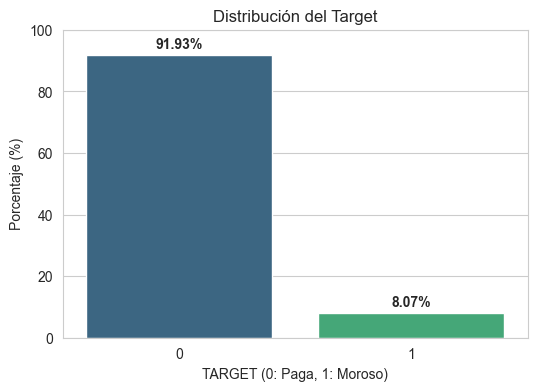

In [20]:
print("Analisis de target...")

target_counts = df_app['TARGET'].value_counts(normalize=True) * 100

# Creamos el gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette='viridis', legend=False)

plt.title('Distribución del Target')
plt.ylim(0, 100)
plt.ylabel('Porcentaje (%)')
plt.xlabel('TARGET (0: Paga, 1: Moroso)')

# Etiquetas de porcentaje
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()

- Se puede visualizar que el Dataset se encuentra desbalanceado teniendo un 8% aproximadamente como Moroso.

A continuación analizaremos los nulos y duplicados en el dataset.

In [21]:
print("Calidad de los datos...")

# Valores nulos
null_percent = (df_app.isnull().sum() / len(df_app) * 100).sort_values(ascending=False)
null_percent = null_percent[null_percent > 0]

# Top 10 columnas con más valores nulos
null_table = pd.DataFrame({
    'Columna': null_percent.index,
    'Porcentaje Nulos (%)': null_percent.values.round(2),
    'Cantidad Nulos': (null_percent.values / 100 * len(df_app)).astype(int)
}).head(10)
display(null_table)

# Duplicados
duplicados = df_app.duplicated().sum()
duplicados_id = df_app['SK_ID_CURR'].duplicated().sum()

print(f"\nFilas totalmente duplicadas: {duplicados}")
print(f"IDs de cliente duplicados: {duplicados_id}")

if duplicados == 0 and duplicados_id == 0:
    print("No se encontraron valores duplicados en la tabla principal.")
else:
    print("Se encontraron valores duplicados.")


Calidad de los datos...


,Columna,Porcentaje Nulos (%),Cantidad Nulos
0,COMMONAREA_AVG,69.87,214865
1,COMMONAREA_MODE,69.87,214865
2,COMMONAREA_MEDI,69.87,214865
3,NONLIVINGAPARTMENTS_MEDI,69.43,213514
4,NONLIVINGAPARTMENTS_MODE,69.43,213514
5,NONLIVINGAPARTMENTS_AVG,69.43,213514
6,FONDKAPREMONT_MODE,68.39,210295
7,LIVINGAPARTMENTS_AVG,68.35,210199
8,LIVINGAPARTMENTS_MEDI,68.35,210199
9,LIVINGAPARTMENTS_MODE,68.35,210199



Filas totalmente duplicadas: 0
IDs de cliente duplicados: 0
No se encontraron valores duplicados en la tabla principal.


En el siguiente código analizaremos las anomalías y outliers del dataset.

Detección de outliers...
Clientes con 'DAYS_EMPLOYED' anómalo (365243): 55374
Porcentaje afectado: 18.01%


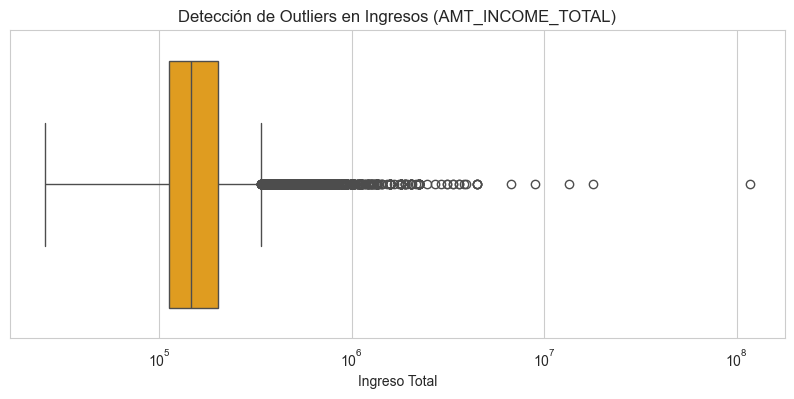

In [27]:
print("Detección de outliers...")

anomalias = df_app[df_app['DAYS_EMPLOYED'] == 365243]
print(f"Clientes con 'DAYS_EMPLOYED' anómalo (365243): {len(anomalias)}")
print(f"Porcentaje afectado: {len(anomalias)/len(df_app)*100:.2f}%")

# Visualizar Outliers en Ingresos
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_app['AMT_INCOME_TOTAL'], color='orange')
plt.title('Detección de Outliers en Ingresos (AMT_INCOME_TOTAL)')
plt.xlabel('Ingreso Total')
plt.xscale('log')
plt.show()

En el siguiente código analizaremos las correlaciones con el TARGET.

Correlaciones entre variables...
Variables que más AUMENTAN el riesgo (Corr Positiva):
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
Name: TARGET, dtype: float64

Variables que más DISMINUYEN el riesgo (Corr Negativa):
EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64
Mostrando top 10 variables más correlacionadas con TARGET:
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE']


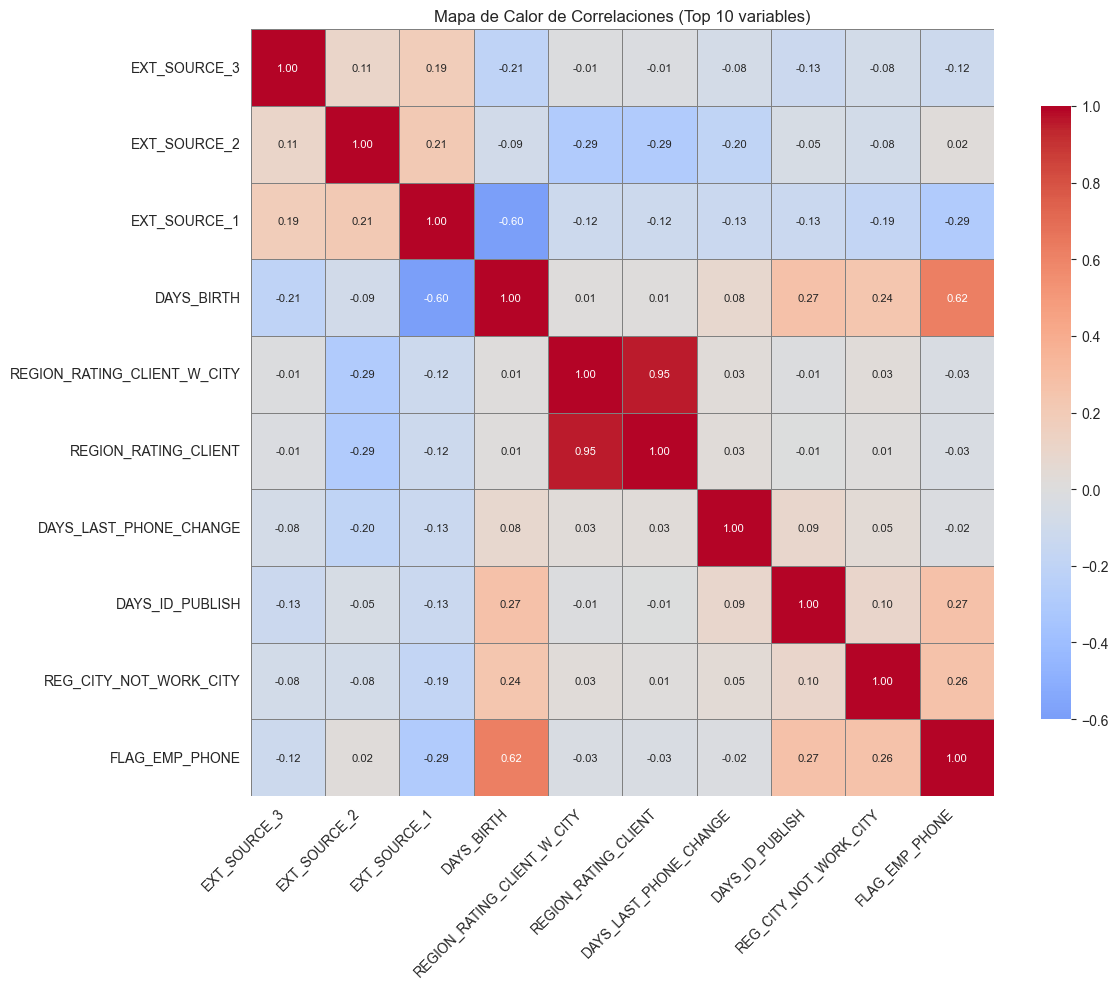

In [ ]:
print("Correlaciones entre variables...")

# Seleccionar solo numéricas para correlación rápida
numeric_cols = df_app.select_dtypes(include=['number']).columns
correlations = df_app[numeric_cols].corr()['TARGET'].sort_values()

print("Variables que más AUMENTAN el riesgo (Corr Positiva):")
print(correlations.tail(6)[0:5]) 

print("\nVariables que más DISMINUYEN el riesgo (Corr Negativa):")
print(correlations.head(5))

# Grafico de calor de correlaciones

# Calculamos la correlación absoluta con TARGET y seleccionar top N variables
corr_with_target = df_app[numeric_cols].corr()['TARGET'].abs().sort_values(ascending=False)
top_n = 10
top_features = corr_with_target.drop('TARGET').head(top_n).index.tolist()

print(f"Mostrando top {top_n} variables más correlacionadas con TARGET:")
print(top_features)

# Matriz de correlación reducida (solo top 10 features)
corr_matrix = df_app[top_features].corr()

# Heatmap top 10
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", annot_kws={"size":8}, linewidths=0.5, linecolor='gray', cbar_kws={"shrink": .8})
plt.title(f'Mapa de Calor de Correlaciones (Top {top_n} variables)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Analisis de edad y riesgo...


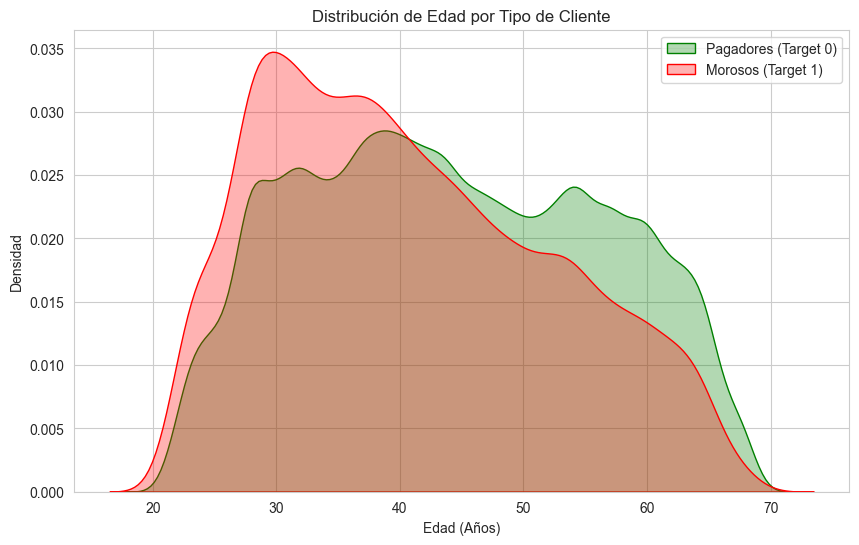

Interpretación: Los clientes más jóvenes tienen una densidad de morosidad (rojo) proporcionalmente mayor que los clientes mayores.


In [ ]:
print("Analisis de edad y riesgo...")
df_app['YEARS_BIRTH'] = df_app['DAYS_BIRTH'] / -365 # DAYS_BIRTH es negativo, lo pasamos a años positivos

# Gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df_app.loc[df_app['TARGET'] == 0, 'YEARS_BIRTH'], label='Pagadores (Target 0)', fill=True, color='green', alpha=0.3)
sns.kdeplot(df_app.loc[df_app['TARGET'] == 1, 'YEARS_BIRTH'], label='Morosos (Target 1)', fill=True, color='red', alpha=0.3)

plt.title('Distribución de Edad por Tipo de Cliente')
plt.xlabel('Edad (Años)')
plt.ylabel('Densidad')
plt.legend()
plt.show()
print("Los clientes más jóvenes tienen una densidad de morosidad (rojo) proporcionalmente mayor que los clientes mayores.")

Finalmente exploraremos los siguientes datos.

In [25]:
# Exploramos los siguientes archivos de datos .parquet
files = [f for f in os.listdir(DATA_PATH) if f.endswith('.parquet') and 'application' not in f]

for file in files:
    print(f"\n--- Tabla: {file} ---")
    temp_df = pd.read_parquet(f'{DATA_PATH}{file}')
    display(temp_df.head(3))
    print(f"Dimensiones (fila, columna): {temp_df.shape}")
    print("Columnas clave:", [c for c in temp_df.columns if 'SK_ID' in c])


--- Tabla: bureau.parquet ---


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


Dimensiones (fila, columna): (1716428, 17)
Columnas clave: ['SK_ID_CURR', 'SK_ID_BUREAU']

--- Tabla: bureau_balance.parquet ---


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


Dimensiones (fila, columna): (27299925, 3)
Columnas clave: ['SK_ID_BUREAU']

--- Tabla: credit_card_balance.parquet ---


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


Dimensiones (fila, columna): (3840312, 23)
Columnas clave: ['SK_ID_PREV', 'SK_ID_CURR']

--- Tabla: HomeCredit_columns_description.parquet ---


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,None
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,None
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,None


Dimensiones (fila, columna): (219, 5)
Columnas clave: []

--- Tabla: installments_payments.parquet ---


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


Dimensiones (fila, columna): (13605401, 8)
Columnas clave: ['SK_ID_PREV', 'SK_ID_CURR']

--- Tabla: master_table.parquet ---


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,CC_SK_DPD_MAX,CC_SK_DPD_MEAN,CC_SK_DPD_SUM,CC_SK_DPD_DEF_MIN,CC_SK_DPD_DEF_MAX,CC_SK_DPD_DEF_MEAN,CC_SK_DPD_DEF_SUM,CC_COUNT,TARGET,SK_ID_CURR
0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,1,100002
1,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,100003
2,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,100004


Dimensiones (fila, columna): (307511, 398)
Columnas clave: ['SK_ID_CURR']

--- Tabla: POS_CASH_balance.parquet ---


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


Dimensiones (fila, columna): (10001358, 8)
Columnas clave: ['SK_ID_PREV', 'SK_ID_CURR']
